In [1]:
from Hand_digits import *
from matplotlib.image import imread
import time
%matplotlib notebook

In [2]:
hidden_layers = [32, 32, 32, 32]
train_set, train_lab, dev_set, dev_lab = create_sets(m=60000)

Cost at last epoch for GD optimizer: 2.3052
Cost at last epoch for GDM optimizer: 2.3062
Cost at last epoch for RMS optimizer: 0.1153
Cost at last epoch for ADAM optimizer: 1.3316


<IPython.core.display.Javascript object>


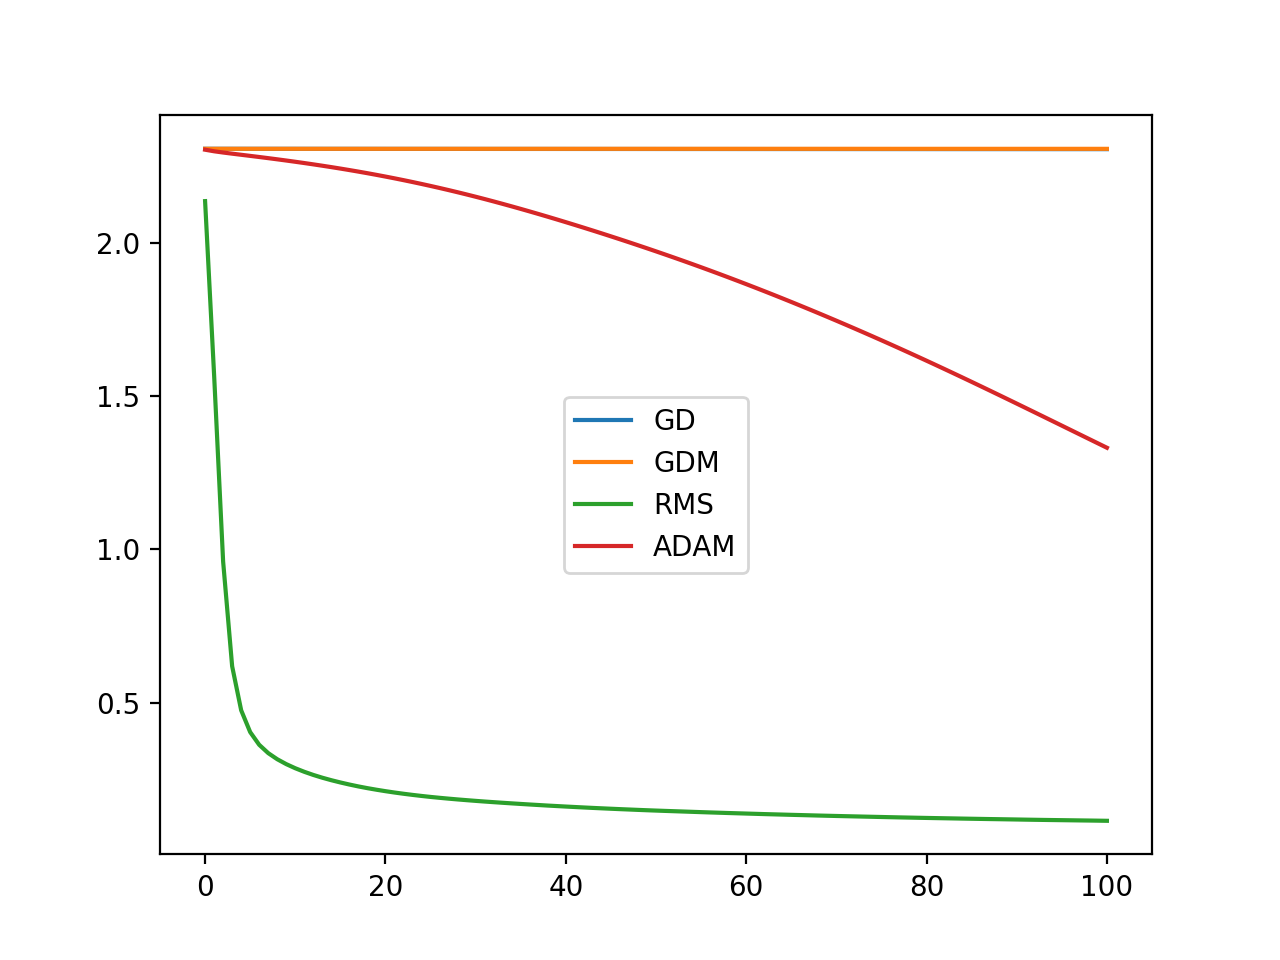

In [4]:
num_ep = 100

parameters = initialize_params(train_set, train_lab, hidden_layers, initialization='xavier', seed=True)
cost_batches_GD, cost_epochs_GD = model_mini_batch(train_set, train_lab, parameters, learning_rate=0.00001,
                                                   learning_rate_decay=0.005, epochs=num_ep, batch_size=1024,
                                                   beta1=0.9, beta2=0.999, epsilon=1e-8, optimizer='GD',
                                                   print_every='last', plot_cost=False, print_accuracy=False)


parameters = initialize_params(train_set, train_lab, hidden_layers, initialization='xavier', seed=True)
cost_batches_GDM, cost_epochs_GDM = model_mini_batch(train_set, train_lab, parameters, learning_rate=0.00001,
                                                     learning_rate_decay=0.005, epochs=num_ep, batch_size=1024,
                                                     beta1=0.9, beta2=0.999, epsilon=1e-8, optimizer='GDM',
                                                     print_every='last', plot_cost=False, print_accuracy=False)


parameters = initialize_params(train_set, train_lab, hidden_layers, initialization='xavier', seed=True)
cost_batches_RMS, cost_epochs_RMS = model_mini_batch(train_set, train_lab, parameters, learning_rate=0.00001,
                                                     learning_rate_decay=0.005, epochs=num_ep, batch_size=1024,
                                                     beta1=0.9, beta2=0.999, epsilon=1e-8, optimizer='RMS',
                                                     print_every='last', plot_cost=False, print_accuracy=False)


parameters = initialize_params(train_set, train_lab, hidden_layers, initialization='xavier', seed=True)
cost_batches_ADAM, cost_epochs_ADAM = model_mini_batch(train_set, train_lab, parameters, learning_rate=0.00001,
                                                       learning_rate_decay=0.005, epochs=num_ep, batch_size=1024,
                                                       beta1=0.9, beta2=0.999, epsilon=1e-8, optimizer='ADAM',
                                                       print_every='last', plot_cost=False, print_accuracy=False)


plt.plot(cost_epochs_GD, label='GD')
plt.plot(cost_epochs_GDM, label='GDM')
plt.plot(cost_epochs_RMS, label='RMS')
plt.plot(cost_epochs_ADAM, label='ADAM')
plt.legend()
plt.show()

Cost at last epoch for GD optimizer: 0.1115
Cost at last epoch for GDM optimizer: 0.1172
Cost at last epoch for RMS optimizer: 0.1153
Cost at last epoch for ADAM optimizer: 0.1078


<IPython.core.display.Javascript object>


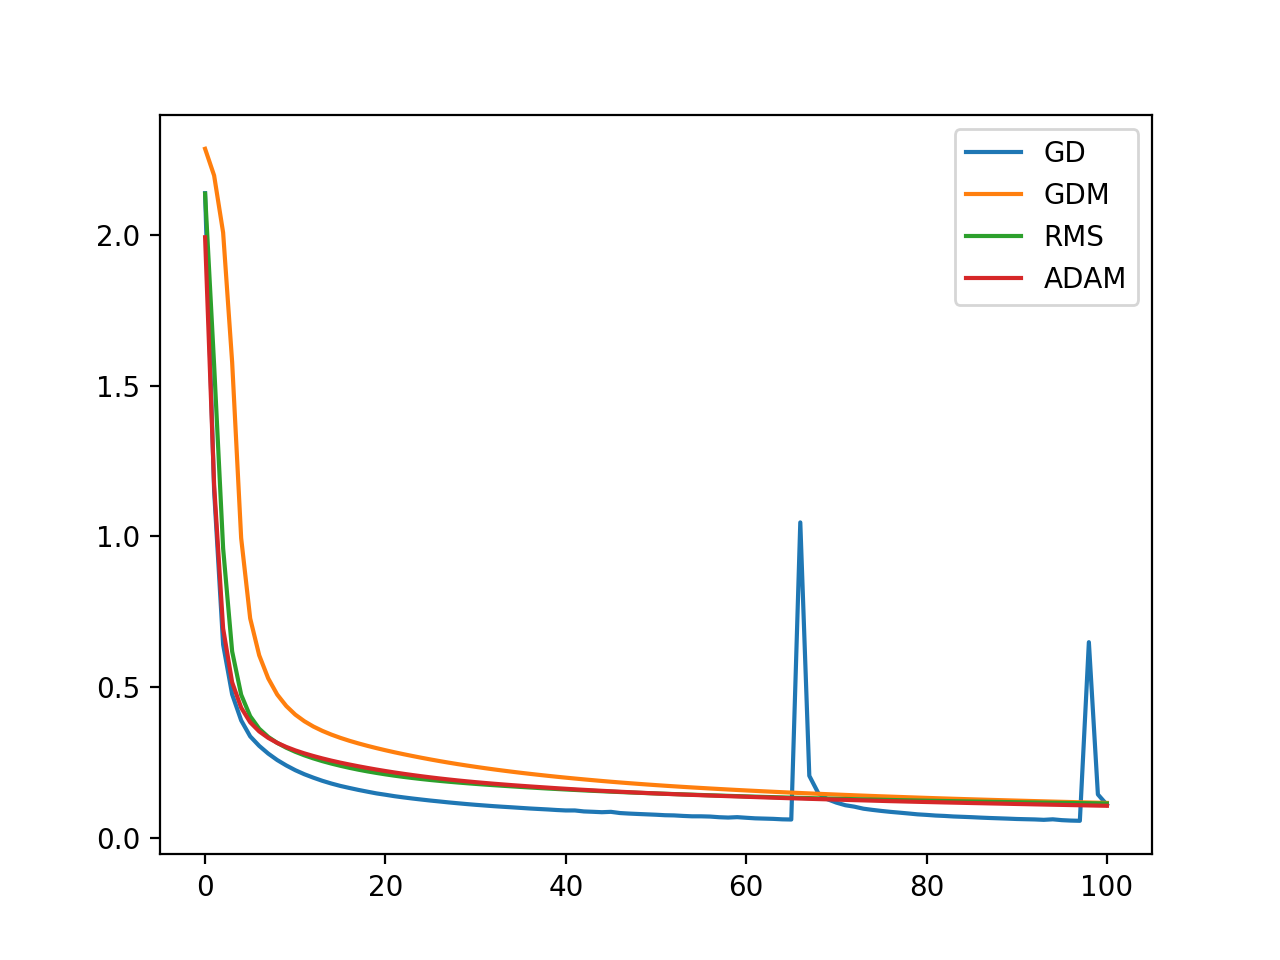

In [28]:
num_ep = 100

parameters = initialize_params(train_set, train_lab, hidden_layers, initialization='xavier', seed=True)
cost_batches_GD, cost_epochs_GD = model_mini_batch(train_set, train_lab, parameters, learning_rate=0.1,
                                                   learning_rate_decay=0.001, epochs=num_ep, batch_size=1024,
                                                   beta1=0.9, beta2=0.999, epsilon=1e-8, optimizer='GD',
                                                   print_every='last', plot_cost=False, print_accuracy=False)


parameters = initialize_params(train_set, train_lab, hidden_layers, initialization='xavier', seed=True)
cost_batches_GDM, cost_epochs_GDM = model_mini_batch(train_set, train_lab, parameters, learning_rate=0.3,
                                                     learning_rate_decay=0.001, epochs=num_ep, batch_size=1024,
                                                     beta1=0.9, beta2=0.999, epsilon=1e-8, optimizer='GDM',
                                                     print_every='last', plot_cost=False, print_accuracy=False)


parameters = initialize_params(train_set, train_lab, hidden_layers, initialization='xavier', seed=True)
cost_batches_RMS, cost_epochs_RMS = model_mini_batch(train_set, train_lab, parameters, learning_rate=0.00001,
                                                     learning_rate_decay=0.005, epochs=num_ep, batch_size=1024,
                                                     beta1=0.9, beta2=0.999, epsilon=1e-8, optimizer='RMS',
                                                     print_every='last', plot_cost=False, print_accuracy=False)


parameters = initialize_params(train_set, train_lab, hidden_layers, initialization='xavier', seed=True)
cost_batches_ADAM, cost_epochs_ADAM = model_mini_batch(train_set, train_lab, parameters, learning_rate=0.0005,
                                                       learning_rate_decay=0.005, epochs=num_ep, batch_size=1024,
                                                       beta1=0.9, beta2=0.999, epsilon=1e-8, optimizer='ADAM',
                                                       print_every='last', plot_cost=False, print_accuracy=False)

plt.plot(cost_epochs_GD, label='GD')
plt.plot(cost_epochs_GDM, label='GDM')
plt.plot(cost_epochs_RMS, label='RMS')
plt.plot(cost_epochs_ADAM, label='ADAM')
plt.legend()
plt.show()

Cost at last epoch for GD optimizer: 2.3063
Cost at last epoch for GDM optimizer: 2.3063
Cost at last epoch for RMS optimizer: 1.5685
Cost at last epoch for ADAM optimizer: 2.2982


<IPython.core.display.Javascript object>


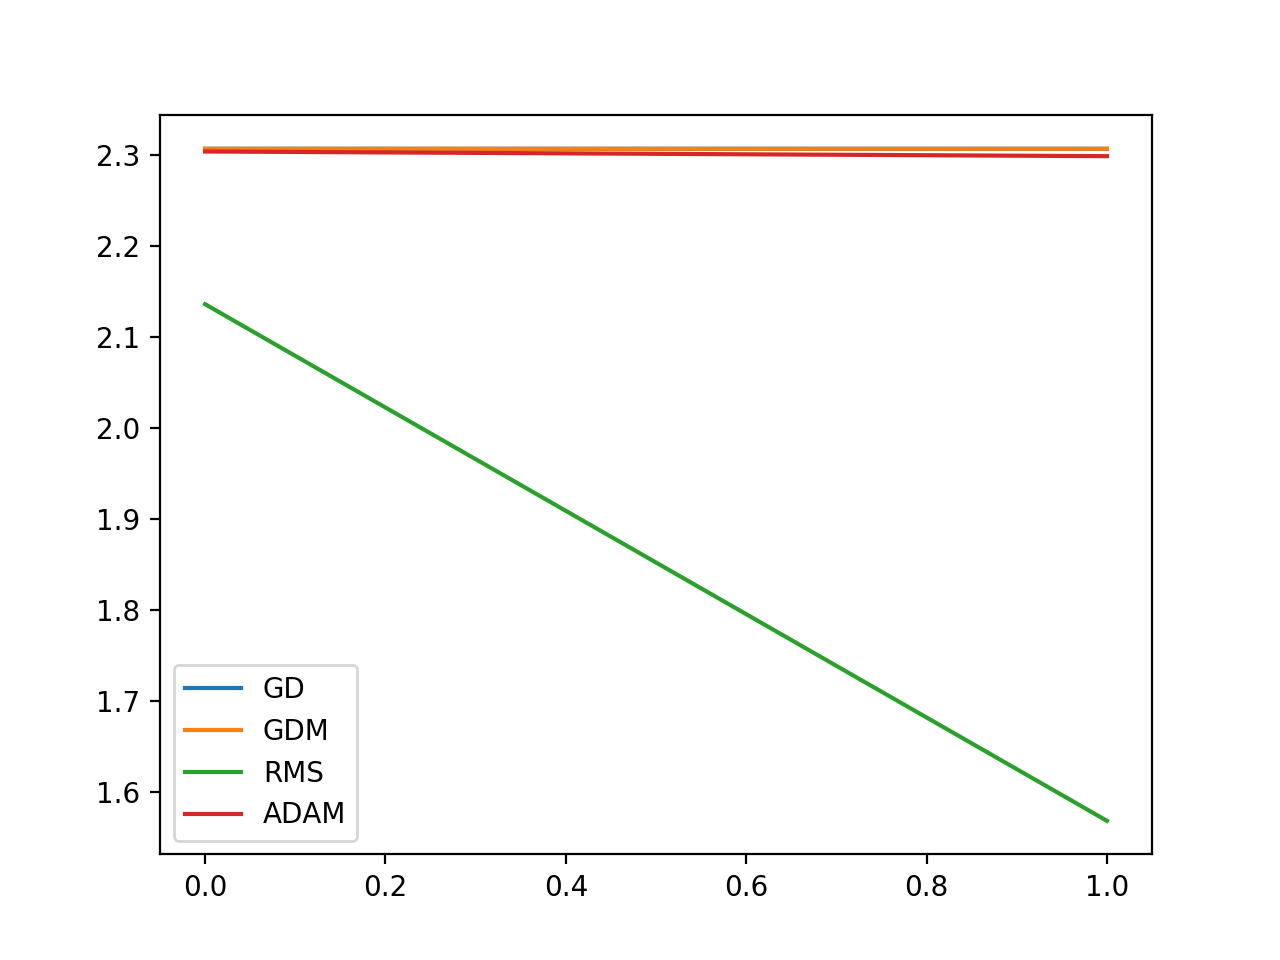

In [29]:
num_ep = 1

parameters = initialize_params(train_set, train_lab, hidden_layers, initialization='xavier', seed=True)
cost_batches_GD, cost_epochs_GD = model_mini_batch(train_set, train_lab, parameters, learning_rate=0.00001,
                                                   learning_rate_decay=0.005, epochs=num_ep, batch_size=1024,
                                                   beta1=0.9, beta2=0.999, epsilon=1e-8, optimizer='GD',
                                                   print_every='last', plot_cost=False, print_accuracy=False)


parameters = initialize_params(train_set, train_lab, hidden_layers, initialization='xavier', seed=True)
cost_batches_GDM, cost_epochs_GDM = model_mini_batch(train_set, train_lab, parameters, learning_rate=0.00001,
                                                     learning_rate_decay=0.005, epochs=num_ep, batch_size=1024,
                                                     beta1=0.9, beta2=0.999, epsilon=1e-8, optimizer='GDM',
                                                     print_every='last', plot_cost=False, print_accuracy=False)


parameters = initialize_params(train_set, train_lab, hidden_layers, initialization='xavier', seed=True)
cost_batches_RMS, cost_epochs_RMS = model_mini_batch(train_set, train_lab, parameters, learning_rate=0.00001,
                                                     learning_rate_decay=0.005, epochs=num_ep, batch_size=1024,
                                                     beta1=0.9, beta2=0.999, epsilon=1e-8, optimizer='RMS',
                                                     print_every='last', plot_cost=False, print_accuracy=False)


parameters = initialize_params(train_set, train_lab, hidden_layers, initialization='xavier', seed=True)
cost_batches_ADAM, cost_epochs_ADAM = model_mini_batch(train_set, train_lab, parameters, learning_rate=0.00001,
                                                       learning_rate_decay=0.005, epochs=num_ep, batch_size=1024,
                                                       beta1=0.9, beta2=0.999, epsilon=1e-8, optimizer='ADAM',
                                                       print_every='last', plot_cost=False, print_accuracy=False)


plt.plot(cost_epochs_GD, label='GD')
plt.plot(cost_epochs_GDM, label='GDM')
plt.plot(cost_epochs_RMS, label='RMS')
plt.plot(cost_epochs_ADAM, label='ADAM')
plt.legend()
plt.show()

In [ ]:
real = [3, 0, 2, 7, 5, 9, 1, 4, 8, 6, 3, 8]

def predict_image(image, params):

    img = image[:, :, 0]
    img = img.reshape(784, 1)

    a_final, _ = forward_prop(img, params)
    res = from_array_to_onehot(a_final)
    
    #plt.imshow(image)
    #plt.show()

    print('Picture is a {} --- {}!'.format(np.argmax(res), real[i-1]))
    

for i in range(1, 13):
    image = imread('/Users/andrea/Desktop/deeplearning.ai/images/test{}.png'.format(i))
    predict_image(image, parameters)
    #time.sleep(3)